## ANALISIS DE DATOS DE OPINIONES EN PORTAL BGG (BOARD GAMES GEEK)

>Una vez limpiado los datos del dataset de juegos de mesa, vamos a analizar lo que nos deparará.  
>
>Primero importamos todas las librerias necesarias para analizarlo.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from pandas_profiling import ProfileReport  

In [33]:
df_clean = pd.read_csv("../data/processed/bgg_proc_clean.csv")

In [34]:
df_clean.head(5)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20343 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  int64  
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20343 non-null  int64  
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 2.2+ MB


>Todas las columnas han sido limpiadas y cuidadas anteriormente,  [aquí](Link_a_preprocesamiento) explico todo el proceso de limpieza del dataset.

>Lo primero que vamos a hacer es una matriz de correlación para ver las diferentes relaciones que hay en cada variable. (Solo dejamos pendientes, la variables "Mechanics" y "Domains" para analizarlas posteriormente ya que tienen mas caracteristicas que valorar).

<AxesSubplot:>

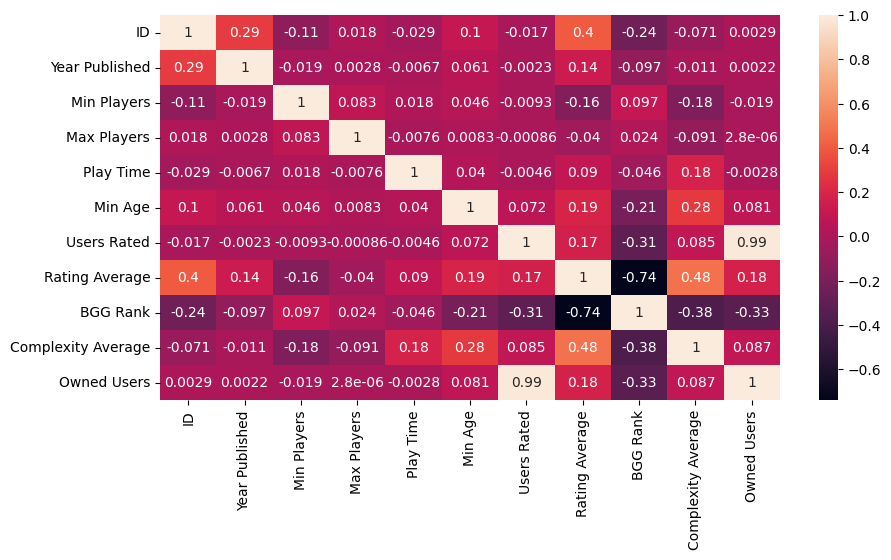

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df_clean.corr(),annot=True)

>De un primer vistazo podemos ver como se relacionan de manera inversa las variables de "Rating Average" y "BGG Rank", esto da que pensar que no necesariamente las valoraciones de este prestigioso portal de juegos de mesa es muy objetiva o que directamente la gente va buscando un tipo de juego que no tiene nada que ver con los gustos de este portal.  
  
    
>Además podemos ver una correlación entre el rating de usuarios y la complejidad del juego, a mayor complejidad mayor es la puntuacion de los usuarios